In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

In [2]:
# Loading the test data

url = 'https://query.data.world/s/ksxft7lhmbxpihskwsngwhpuul6lye'
col_names = ['target','F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']
spectf_df_test= pd.read_table(url,sep=',',names=col_names)


In [3]:
spectf_df_test

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,70,75,72,72,67,71,71,78,63,...,66,67,68,70,70,71,64,67,56,54
76,0,59,57,67,71,66,68,68,70,56,...,62,64,56,53,71,68,64,63,56,56
77,0,67,64,73,75,77,77,74,70,65,...,61,64,65,60,68,75,74,80,67,68
78,0,68,65,72,72,47,74,76,74,67,...,64,69,71,73,73,75,68,56,58,44


In [4]:
# Loading the Train data

url = 'https://query.data.world/s/cuqtpuoewpxysusrt5z4igihjah4xo'
col_names = ['target','F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']
spectf_df= pd.read_table(url,sep=',',names=col_names)


In [5]:
spectf_df

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0,74,69,75,70,70,74,77,77,65,...,66,67,63,61,71,68,66,65,54,57
183,0,72,61,64,66,64,59,68,66,76,...,69,64,67,71,69,68,65,73,56,52
184,0,75,73,72,77,68,67,76,73,67,...,70,67,72,71,79,75,77,75,67,71
185,0,59,62,72,74,66,66,74,76,63,...,65,71,67,69,77,78,77,76,70,70


In [6]:
spectf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  187 non-null    int64
 1   F1R     187 non-null    int64
 2   F1S     187 non-null    int64
 3   F2R     187 non-null    int64
 4   F2S     187 non-null    int64
 5   F3R     187 non-null    int64
 6   F3S     187 non-null    int64
 7   F4R     187 non-null    int64
 8   F4S     187 non-null    int64
 9   F5R     187 non-null    int64
 10  F5S     187 non-null    int64
 11  F6R     187 non-null    int64
 12  F6S     187 non-null    int64
 13  F7R     187 non-null    int64
 14  F7S     187 non-null    int64
 15  F8R     187 non-null    int64
 16  F8S     187 non-null    int64
 17  F9R     187 non-null    int64
 18  F9S     187 non-null    int64
 19  F10R    187 non-null    int64
 20  F10S    187 non-null    int64
 21  F11R    187 non-null    int64
 22  F11S    187 non-null    int64
 23  F12R    187 non

In [7]:
spectf_df.describe()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.919786,65.128342,63.786096,68.304813,68.320856,63.818182,62.374332,69.352941,68.534759,62.839572,...,63.358289,61.695187,65.090909,63.850267,64.390374,62.187166,60.770053,58.406417,51.128342,48.593583
std,0.272353,8.961963,10.157746,6.849231,9.046697,9.569165,10.069062,9.513631,10.614082,9.604879,...,8.673589,12.025874,7.980977,9.171545,13.241857,13.691778,15.516746,16.194568,13.350712,15.087756
min,0.000000,23.000000,21.000000,38.000000,34.000000,21.000000,25.000000,21.000000,20.000000,12.000000,...,18.000000,14.000000,33.000000,18.000000,11.000000,6.000000,5.000000,8.000000,13.000000,4.000000
25%,1.000000,61.000000,58.500000,64.000000,65.000000,60.000000,59.000000,67.000000,66.000000,60.500000,...,61.500000,60.000000,60.500000,59.000000,61.000000,58.000000,55.500000,53.500000,44.000000,42.000000
50%,1.000000,66.000000,65.000000,69.000000,70.000000,65.000000,64.000000,71.000000,71.000000,65.000000,...,66.000000,65.000000,66.000000,66.000000,68.000000,66.000000,66.000000,63.000000,55.000000,52.000000
75%,1.000000,71.000000,70.000000,73.000000,74.000000,70.000000,69.000000,75.000000,75.000000,68.000000,...,69.000000,69.000000,70.000000,70.000000,73.000000,71.000000,72.000000,69.000000,60.000000,60.000000
max,1.000000,83.000000,80.000000,82.000000,84.000000,82.000000,79.000000,85.000000,81.000000,76.000000,...,76.000000,77.000000,80.000000,79.000000,81.000000,81.000000,82.000000,82.000000,82.000000,71.000000


# Checking whether the dataset is balanced or not

<AxesSubplot:xlabel='target', ylabel='count'>

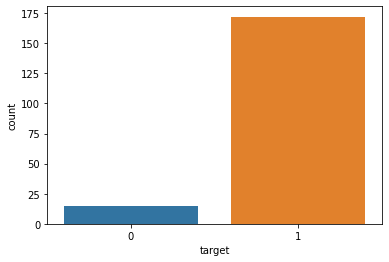

In [8]:
#Train Data balance check
sns.countplot(x='target',data=spectf_df)

<AxesSubplot:xlabel='target', ylabel='count'>

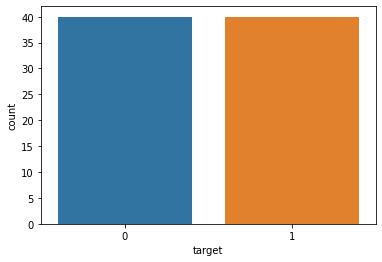

In [9]:
# Test data balance check
sns.countplot(x='target',data=spectf_df_test)

<AxesSubplot:>

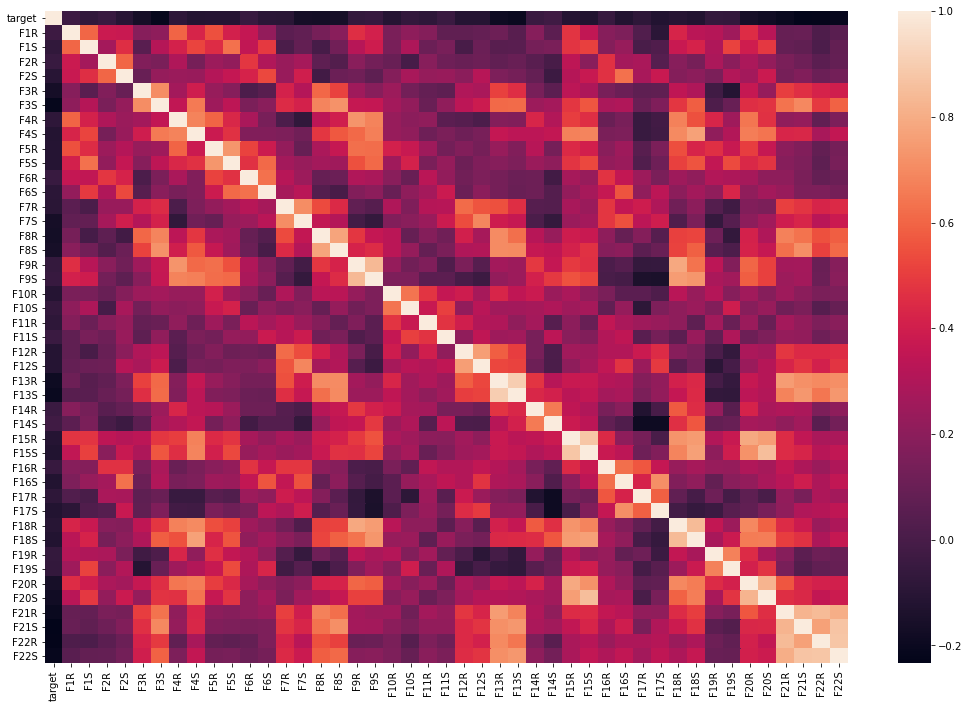

In [10]:
corr_df=spectf_df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr_df)


# Split labels and features

In [11]:
traget=spectf_df['target']

In [12]:
spectf_df.drop('target', axis=1, inplace=True)
spectf_df

,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,67,68,73,78,65,63,67,60,63,62,...,61,56,76,75,74,77,76,74,59,68
1,75,74,71,71,62,58,70,64,71,68,...,66,62,68,69,69,66,64,58,57,52
2,83,64,66,67,67,74,74,72,64,68,...,67,64,69,63,68,54,65,64,43,42
3,72,66,65,65,64,61,71,78,73,69,...,69,68,68,63,71,72,65,63,58,60
4,62,60,69,61,63,63,70,68,70,65,...,66,66,58,56,72,73,71,64,49,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,74,69,75,70,70,74,77,77,65,67,...,66,67,63,61,71,68,66,65,54,57
183,72,61,64,66,64,59,68,66,76,66,...,69,64,67,71,69,68,65,73,56,52
184,75,73,72,77,68,67,76,73,67,65,...,70,67,72,71,79,75,77,75,67,71
185,59,62,72,74,66,66,74,76,63,67,...,65,71,67,69,77,78,77,76,70,70


In [13]:
traget_test=spectf_df_test['target']

In [14]:
spectf_df_test.drop('target', axis=1, inplace=True)
spectf_df_test

,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,59,52,70,67,73,66,72,61,58,52,...,66,56,62,56,72,62,74,74,64,67
1,72,62,69,67,78,82,74,65,69,63,...,65,71,63,60,69,73,67,71,56,58
2,71,62,70,64,67,64,79,65,70,69,...,73,70,66,65,64,55,61,41,51,46
3,69,71,70,78,61,63,67,65,59,59,...,61,61,66,65,72,73,68,68,59,63
4,70,66,61,66,61,58,69,69,72,68,...,67,69,70,66,70,64,60,55,49,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,70,75,72,72,67,71,71,78,63,67,...,66,67,68,70,70,71,64,67,56,54
76,59,57,67,71,66,68,68,70,56,62,...,62,64,56,53,71,68,64,63,56,56
77,67,64,73,75,77,77,74,70,65,62,...,61,64,65,60,68,75,74,80,67,68
78,68,65,72,72,47,74,76,74,67,66,...,64,69,71,73,73,75,68,56,58,44


Steps of PCA
1. Standarization

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#instantiate
 
# compute the mean and standard which will be used in the next command

spect_df=scaler.fit_transform(spectf_df)# fit and transform can be applied together and I leave that for simple exercise
# we can check the minimum and maximum of the scaled features which we expect to be 0 and 1

spect_df_test=scaler.fit_transform(spectf_df_test)


In [17]:
traget

0      1
1      1
2      1
3      1
4      1
      ..
182    0
183    0
184    0
185    0
186    0
Name: target, Length: 187, dtype: int64

In [21]:
# Time taken to train

import time
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
start=time.time()


logreg.fit(spect_df,traget)
end=time.time()


traintime=end-start
print('training time for logreg is:  ',traintime)

training time for logreg is:   0.04102897644042969


In [22]:
y_pred_class=logreg.predict(spect_df_test)

In [23]:
from sklearn import metrics
metrics.accuracy_score(y_pred_class,traget_test)

0.5125

# Apply PCA to logreg model

In [26]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(spect_df)

PCA()

# Min number of components we need

In [30]:
pca.explained_variance_ratio_[:15].sum()

0.8848609248504709

In [32]:
# 1st PC

pca.explained_variance_ratio_[:2].sum()

0.32429332246928266

Text(15, 0.9, '15')

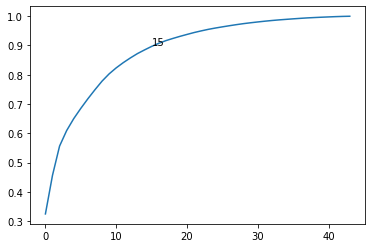

In [34]:
# Relationship b/w PC and variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.annotate('15', xy=(15,.90))

In [35]:
x_pca=PCA(n_components=15)
spect_df_pca=x_pca.fit_transform(spect_df)
spect_df_pca_test=x_pca.fit_transform(spect_df_test)

<AxesSubplot:>

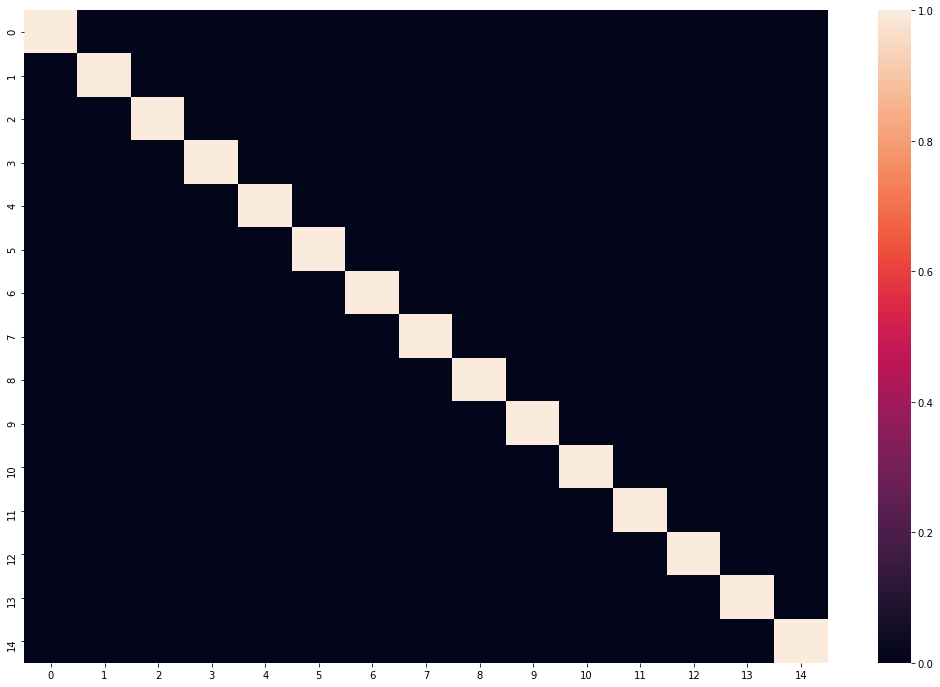

In [37]:
pca_corr=pd.DataFrame(spect_df_pca).corr()
plt.figure(figsize=(18,12))
sns.heatmap(pca_corr)

In [40]:
cols=['F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']



In [42]:
pca_Df=pd.DataFrame(x_pca.components_, columns=cols)
pca_Df

,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,0.035898,-0.017530,-0.111833,-0.111480,-0.017346,-0.037067,-0.002738,-0.047917,-0.172289,-0.177385,...,-0.172270,-0.212356,-0.136592,-0.176232,-0.204724,-0.202868,-0.171772,-0.153752,-0.167514,-0.134945
1,-0.150338,-0.173713,-0.072706,-0.066390,0.049838,0.119820,-0.132181,-0.059531,-0.215582,-0.182137,...,-0.086452,-0.104230,-0.127307,-0.170026,0.034597,-0.031014,0.238562,0.283494,0.251253,0.298699
2,-0.086964,-0.126971,-0.235234,-0.285529,-0.127679,-0.204450,-0.059947,-0.060883,-0.021773,-0.008242,...,0.245296,0.185675,-0.119961,-0.134840,0.037275,-0.003635,-0.058486,-0.067425,-0.032719,-0.038059
3,-0.188783,-0.378312,-0.071752,-0.099683,0.019744,-0.252534,-0.071195,-0.397000,0.071429,-0.182330,...,-0.010185,-0.113113,0.221099,0.068866,0.133788,-0.067314,0.156113,-0.060877,0.081495,-0.044258
4,-0.112765,0.115799,0.027131,0.166600,-0.369932,-0.090385,-0.144873,0.195251,-0.277002,-0.193336,...,0.034682,0.106067,0.139714,0.144355,0.121671,0.334416,-0.052373,0.020502,0.089500,0.067154
5,-0.108223,-0.008476,0.087580,0.136153,0.252898,0.125292,0.206321,0.081701,-0.037327,-0.086344,...,-0.037434,-0.048227,-0.098509,-0.105470,0.064922,0.106551,0.018712,-0.024537,-0.102224,-0.088086
6,-0.041795,-0.022909,-0.265969,-0.134934,-0.225600,-0.135687,-0.074028,0.107837,0.070630,0.055487,...,0.182777,0.148445,0.167146,0.105644,0.011159,0.062472,-0.070914,-0.068456,0.015680,-0.024007
7,0.286378,0.056788,-0.052698,-0.029165,0.175911,-0.040909,0.490332,0.199470,0.081010,-0.078072,...,-0.083207,-0.054863,0.144300,0.028698,0.277380,0.085519,0.095635,-0.011172,0.089447,0.006044
8,0.363232,0.085022,0.344221,0.257188,-0.056993,-0.283664,0.052585,-0.162941,0.011666,-0.030597,...,0.160015,0.022051,-0.242237,-0.242047,0.131933,-0.094896,-0.022160,-0.151861,-0.048793,-0.030476
9,-0.116937,-0.071325,-0.073322,-0.030309,-0.108706,0.173646,-0.120528,-0.021700,0.011192,-0.036586,...,-0.041704,-0.078868,-0.328393,-0.252233,-0.025026,0.064426,-0.174726,-0.127754,-0.291104,-0.280583


<AxesSubplot:>

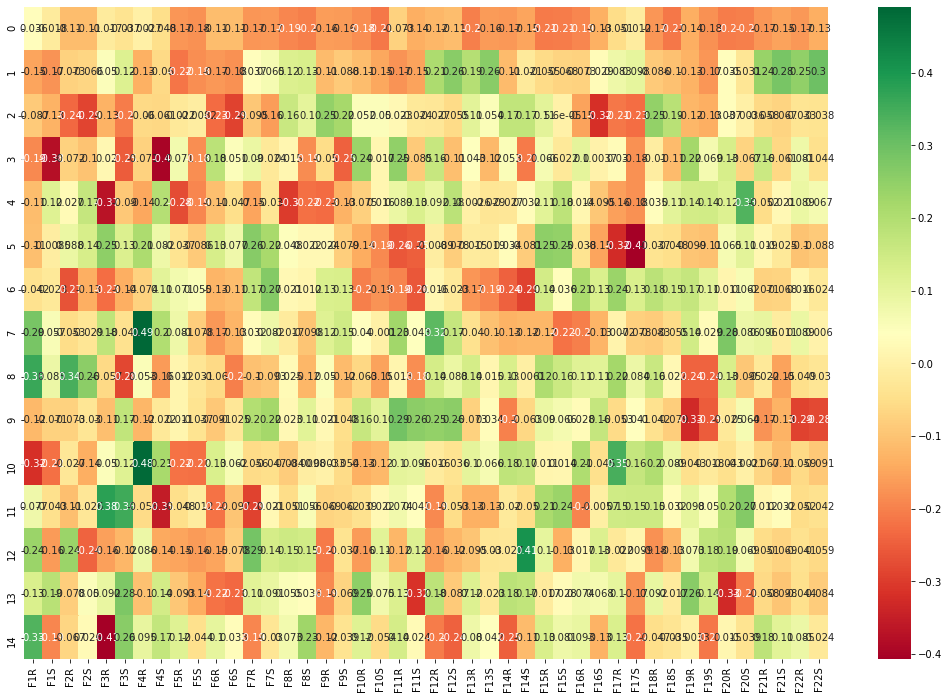

In [44]:
plt.figure(figsize=(18,12))
sns.heatmap(pca_Df,cmap='RdYlGn', annot=True)

## Your task is to create the logreg model and put PCs as features and check the accuracy and how long it takes to train

In [ ]:
# Time taken to train

import time
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
start=time.time()


logreg.fit(spect_df_pca,traget)
end=time.time()


traintime=end-start
print('training time for logreg is:  ',traintime)